# Analysis of Diabetes Data

In this analysis, we will explore and analyze a dataset containing information about diabetes. The dataset includes various features such as age, BMI, blood pressure, and glucose levels, among others. Our goal is to gain insights and understand the relationship between these variables and the presence or absence of diabetes.

By examining this dataset, we aim to uncover patterns, trends, and potential risk factors associated with diabetes. This analysis will help us better understand the factors that contribute to the development of diabetes and potentially identify strategies for prevention and management.

Throughout this analysis, we will utilize various data visualization techniques, statistical analysis, and machine learning algorithms to extract meaningful information from the dataset. We will also perform data cleaning and preprocessing steps to ensure the accuracy and reliability of our analysis.

Let's begin the exploration and analysis of the diabetes dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
data_path = r'/kaggle/input/diabetes-healthcare-dataset/Diabetes-Data.csv'
df = pd.read_csv(data_path)

df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Sure! Here's an explanation of each variable:

- **Pregnancies**: This variable represents the number of times the individual has been pregnant.

- **Glucose**: This variable represents the blood glucose concentration of the individual, measured in mg/dL.

- **BloodPressure**: This variable represents the diastolic blood pressure (mm Hg) of the individual.

- **SkinThickness**: This variable represents the thickness of the skinfold at the triceps (mm) of the individual.

- **Insulin**: This variable represents the 2-hour serum insulin (mu U/ml) of the individual.

- **BMI**: This variable represents the body mass index (weight in kg / height in m^2) of the individual.

- **DiabetesPedigreeFunction**: This variable represents a function that scores the likelihood of diabetes based on family history.

- **Age**: This variable represents the age (years) of the individual.

- **Outcome**: This variable represents the presence (1) or absence (0) of diabetes in the individual.

These variables provide important information about the individuals in the dataset and can be used to analyze and understand the factors associated with diabetes.

In [3]:
summary = df.describe().T
print(summary)

                           count         mean         std     min      25%  \
Id                        2768.0  1384.500000  799.197097   1.000  692.750   
Pregnancies               2768.0     3.742775    3.323801   0.000    1.000   
Glucose                   2768.0   121.102601   32.036508   0.000   99.000   
BloodPressure             2768.0    69.134393   19.231438   0.000   62.000   
SkinThickness             2768.0    20.824422   16.059596   0.000    0.000   
Insulin                   2768.0    80.127890  112.301933   0.000    0.000   
BMI                       2768.0    32.137392    8.076127   0.000   27.300   
DiabetesPedigreeFunction  2768.0     0.471193    0.325669   0.078    0.244   
Age                       2768.0    33.132225   11.777230  21.000   24.000   
Outcome                   2768.0     0.343931    0.475104   0.000    0.000   

                               50%       75%      max  
Id                        1384.500  2076.250  2768.00  
Pregnancies                  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

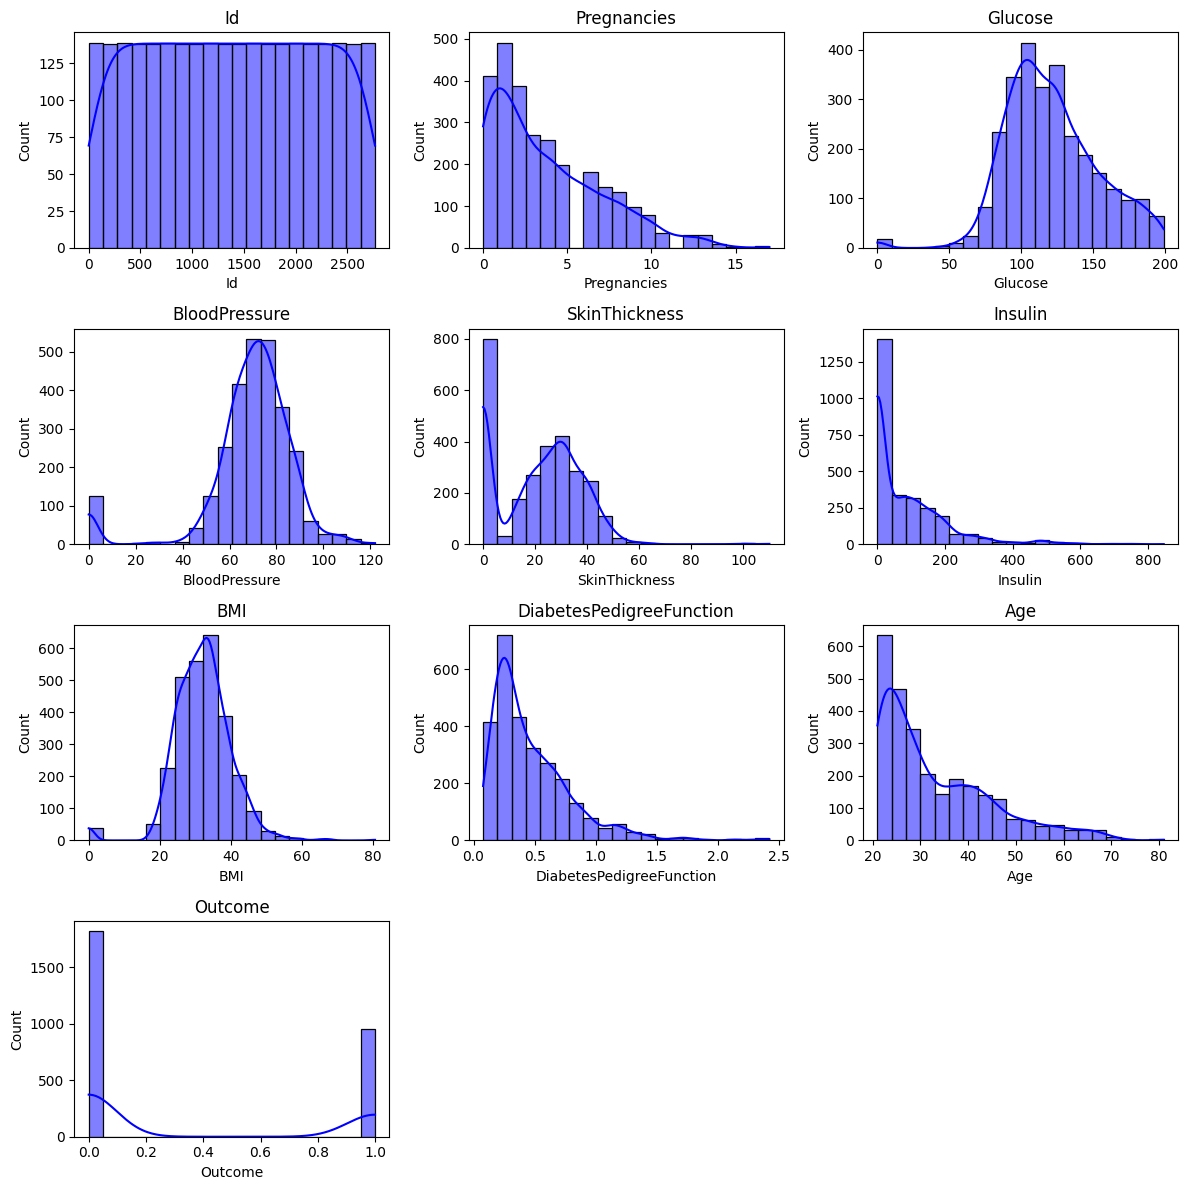

In [4]:
plt.figure(figsize=(12, 12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=20, kde=True, color='blue')
    plt.title(column)

plt.tight_layout()
plt.show()

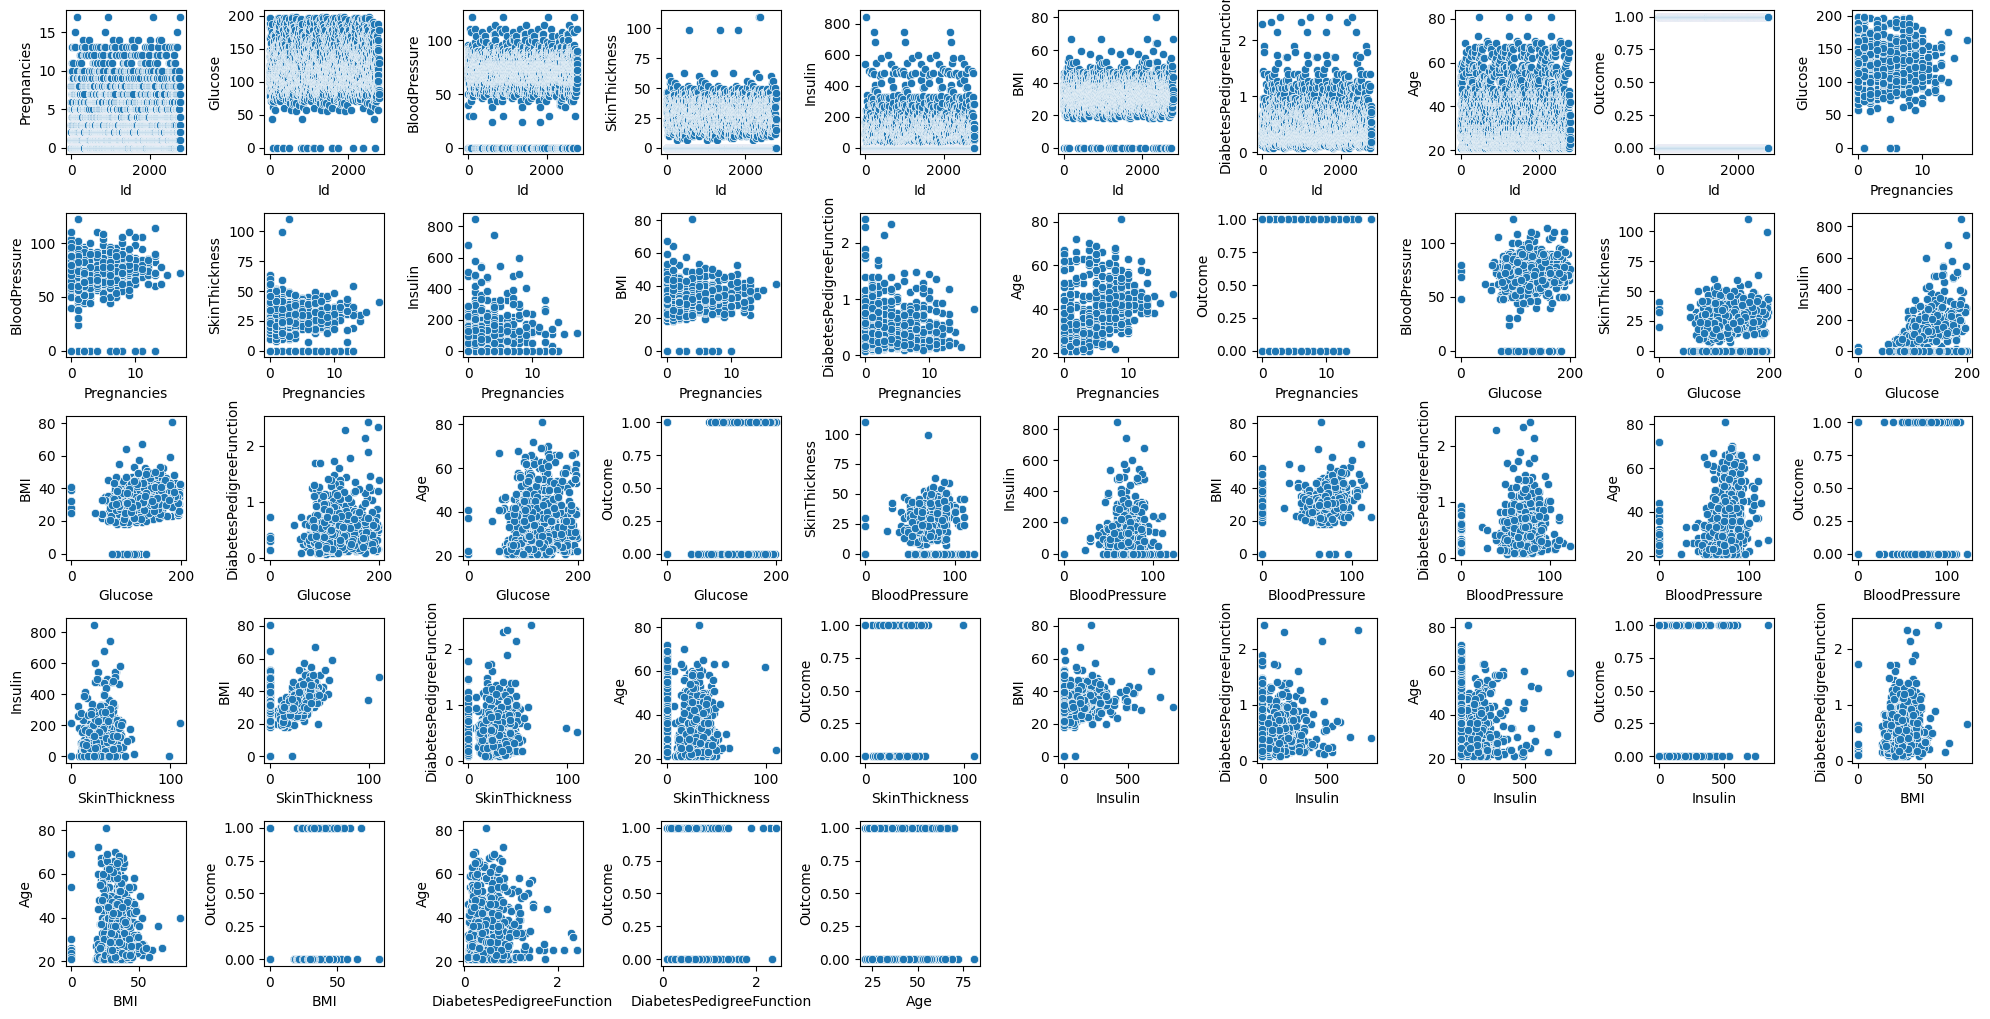

In [5]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Create scatter plots for each pair of numerical columns
num_cols = len(numerical_columns)
plt.figure(figsize=(20, 20))

plot_number = 1
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        plt.subplot(num_cols, num_cols, plot_number)
        sns.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]])
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plot_number += 1

plt.tight_layout()
plt.show()

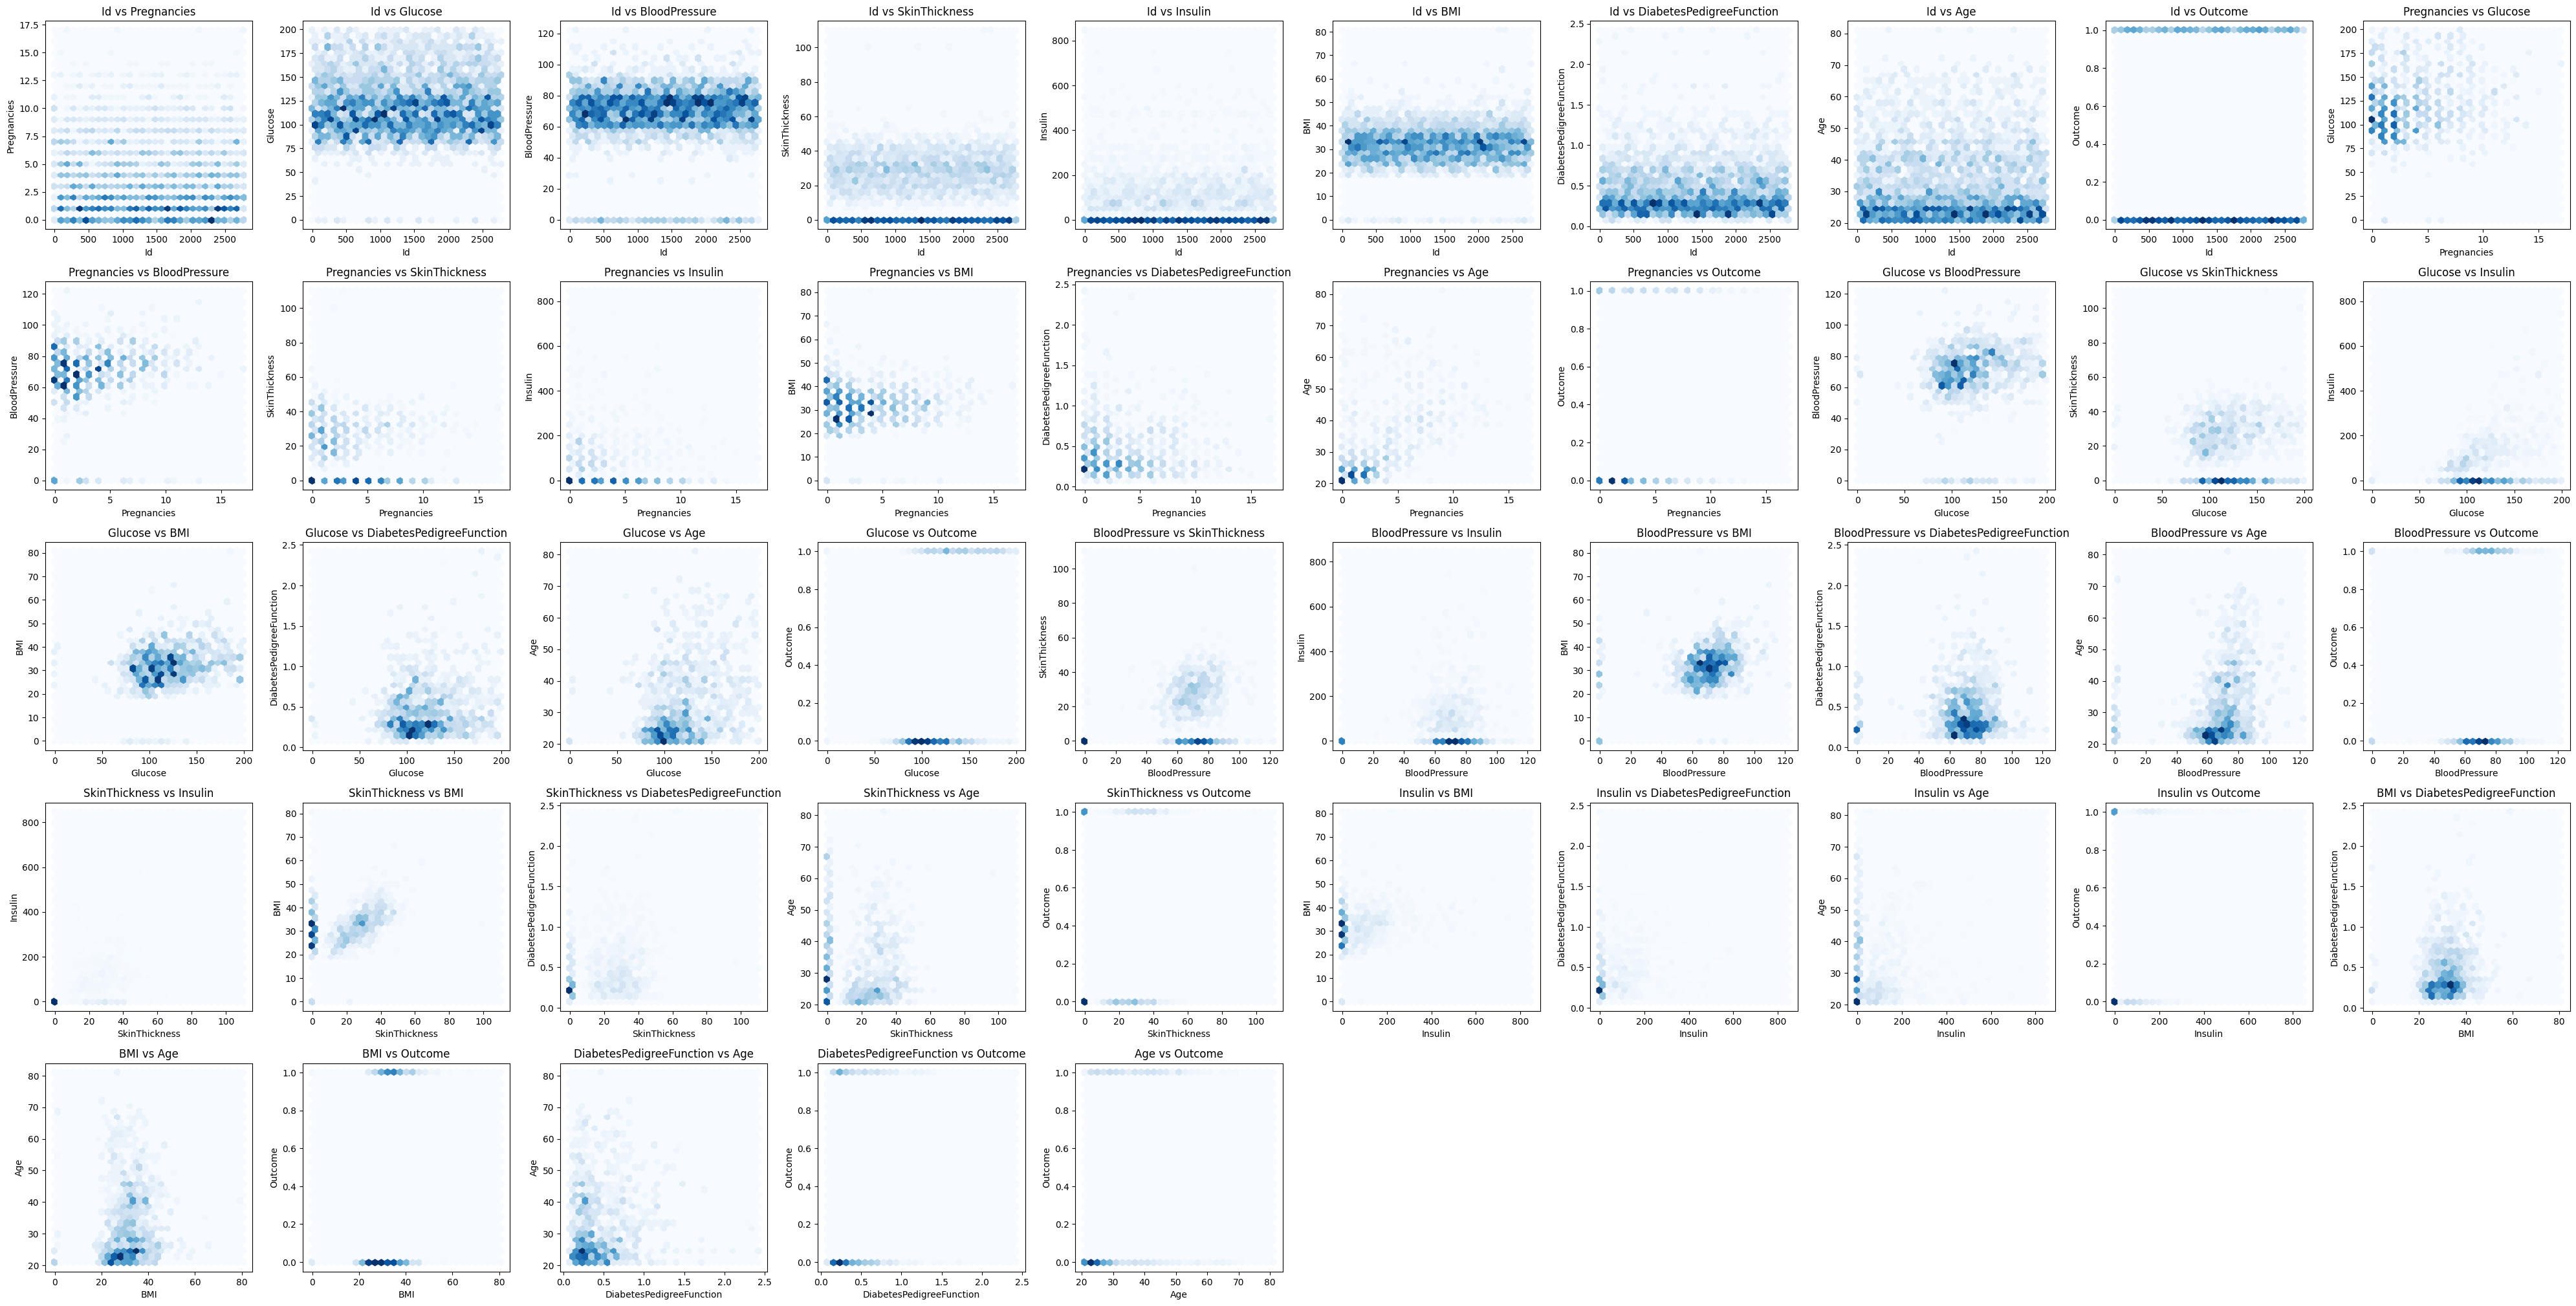

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns
# Create hexbin plots for each pair of numerical columns
num_cols = len(numerical_columns)
plt.figure(figsize=(40, 40))

plot_number = 1
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        plt.subplot(num_cols, num_cols, plot_number)
        plt.hexbin(df[numerical_columns[i]], df[numerical_columns[j]], gridsize=30, cmap='Blues')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        plot_number += 1

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

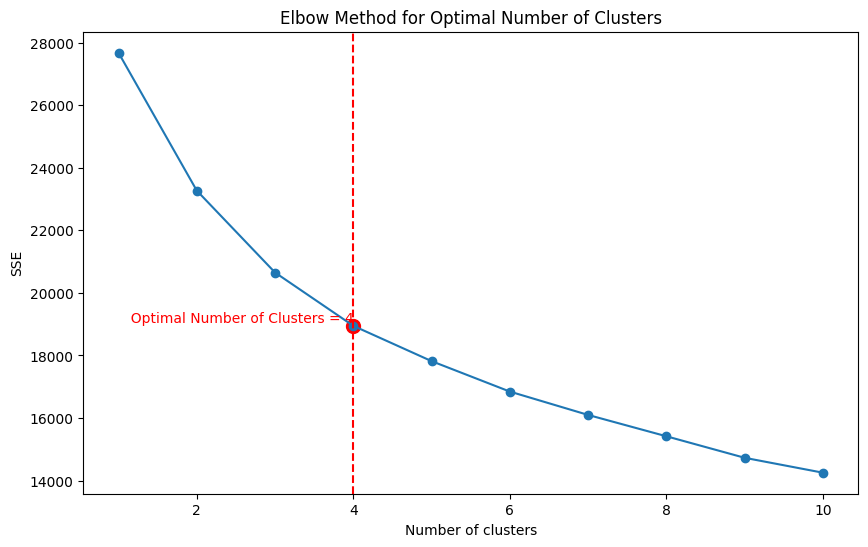

In [7]:


numerical_columns = df.select_dtypes(include=['number']).columns
data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
optimal_k = 4  # Adjust this based on where you see the elbow
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.scatter(optimal_k, sse[optimal_k-1], color='red', s=100)
plt.text(optimal_k, sse[optimal_k-1], f'  Optimal Number of Clusters = {optimal_k}', 
         verticalalignment='bottom', horizontalalignment='right', color='red')

plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


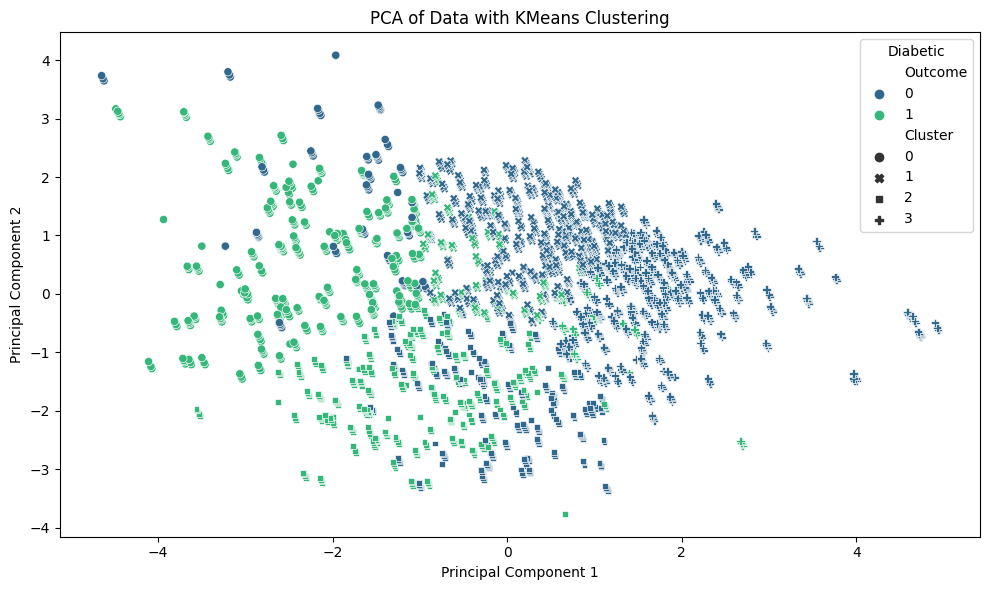

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform KMeans clustering with 4 clusters on the reduced data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
pca_df['Outcome'] = df['Outcome']

# Plot the data using a scatter plot, coloring by diabetic status and clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Outcome'], style=pca_df['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data with KMeans Clustering')
plt.legend(title='Diabetic')
plt.tight_layout()
plt.show()

In [9]:
cluster_summary = df.groupby('Cluster').mean()

# Display the summary
print(cluster_summary)

                  Id  Pregnancies     Glucose  BloodPressure  SkinThickness  \
Cluster                                                                       
0        1414.045833     3.666667  153.212500      76.622917      36.241667   
1        1411.275463     2.081019  112.050926      68.896991      28.288194   
2        1349.192982     7.171053  133.678363      75.440058      12.029240   
3        1366.708108     2.563514   99.218919      58.725676      10.239189   

            Insulin        BMI  DiabetesPedigreeFunction        Age   Outcome  
Cluster                                                                        
0        215.750000  38.793542                  0.689517  34.972917  0.812500  
1         98.701389  33.837384                  0.486934  26.873843  0.148148  
2         25.273392  32.143860                  0.427892  46.090643  0.574561  
3         21.174324  25.829054                  0.351222  27.267568  0.055405  
